In [3]:
import os
import glob
import numpy as np
import scipy.sparse as sp
from libra_py import units, data_stat, influence_spectrum
import matplotlib.pyplot as plt
from liblibra_core import *
from libra_py.workflows.nbra import step3
import libra_py.packages.cp2k.methods as CP2K_methods

<IPython.core.display.Javascript object>


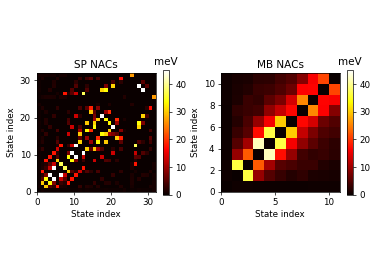

In [8]:
%matplotlib notebook
plt.figure()
titles = ['SP','MB']
for c1, basis in enumerate(['sd', 'ci']):
    plt.subplot(1, 2, c1+1)
    nac_files = glob.glob(F'/projects/academic/alexeyak/miguelrecio/TiO2/step3_NACs/04_00/pbe/res-mb-sd-DFT/Hvib_{basis}*im*')
    for c2, nac_file in enumerate(nac_files):
        nac_mat = sp.load_npz(nac_file).todense().real
        if c2==0:
            nac_ave = np.zeros(nac_mat.shape)
        nac_ave += np.abs(nac_mat)
    nac_ave *= 1000*units.au2ev/c2
    nstates = nac_ave.shape[0]
    plt.imshow(np.flipud(nac_ave), cmap='hot', extent=(0,nstates,0,nstates))#, vmin=0, vmax=100)
    plt.xlabel('State index')
    plt.ylabel('State index')
    colorbar = plt.colorbar(shrink=0.50)
    colorbar.ax.set_title('meV')
    plt.clim(vmin=0, vmax=45)
    plt.title(F'{titles[c1]} NACs')
    plt.tight_layout()